# Data Preparation

In [2]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
symbols = "NIFTY 500,NIFTY 100,NIFTY 200,NIFTY NEXT 50".split(',')
symbols

data={}
for s in symbols:
    data[s] = get_history(symbol=s,
                           start=date(2019,1,1),
                           end=date(2021,10,31),
                           index=True)['Close']

df_comp= pd.DataFrame(data)
df_comp


,NIFTY 500,NIFTY 100,NIFTY 200,NIFTY NEXT 50
Date,,,,
2019-01-01,9197.90,11148.80,5773.70,28111.65
2019-01-02,9103.40,11032.00,5712.10,27876.95
2019-01-03,9014.80,10914.80,5652.95,27674.65
2019-01-04,9054.90,10966.15,5680.50,27719.50
2019-01-07,9081.15,11005.10,5699.10,27706.60
...,...,...,...,...
2021-10-25,15334.35,18272.40,9519.10,42032.60
2021-10-26,15499.65,18425.15,9610.55,42528.95
2021-10-27,15484.35,18390.05,9595.60,42748.65


In [4]:
df_comp = df_comp.asfreq('b')   # < -- setting b (business days) 
                                        #avoids unnecessary time periods

df_comp.head()

,NIFTY 500,NIFTY 100,NIFTY 200,NIFTY NEXT 50
Date,,,,
2019-01-01,9197.90,11148.80,5773.70,28111.65
2019-01-02,9103.40,11032.00,5712.10,27876.95
2019-01-03,9014.80,10914.80,5652.95,27674.65
2019-01-04,9054.90,10966.15,5680.50,27719.50
2019-01-07,9081.15,11005.10,5699.10,27706.60


In [5]:
df_comp.isna().sum()

NIFTY 500        40
NIFTY 100        40
NIFTY 200        40
NIFTY NEXT 50    40
dtype: int64

In [6]:
df_comp['NIFTY 500'] = df_comp['NIFTY 500'].fillna(method='ffill')

In [7]:
df_comp['NIFTY 100'] = df_comp['NIFTY 100'].fillna(method='ffill')
df_comp['NIFTY 200'] = df_comp['NIFTY 200'].fillna(method='ffill')
df_comp['NIFTY NEXT 50'] = df_comp['NIFTY NEXT 50'].fillna(method='ffill')

In [8]:
df_comp.isna().sum()

NIFTY 500        0
NIFTY 100        0
NIFTY 200        0
NIFTY NEXT 50    0
dtype: int64

In [9]:
df_comp

,NIFTY 500,NIFTY 100,NIFTY 200,NIFTY NEXT 50
Date,,,,
2019-01-01,9197.90,11148.80,5773.70,28111.65
2019-01-02,9103.40,11032.00,5712.10,27876.95
2019-01-03,9014.80,10914.80,5652.95,27674.65
2019-01-04,9054.90,10966.15,5680.50,27719.50
2019-01-07,9081.15,11005.10,5699.10,27706.60
...,...,...,...,...
2021-10-25,15334.35,18272.40,9519.10,42032.60
2021-10-26,15499.65,18425.15,9610.55,42528.95
2021-10-27,15484.35,18390.05,9595.60,42748.65


In [10]:
size = int(len(df_comp)*0.8)   # find the length of the entire set
                               # and take 80 percent of that.
size

df  = df_comp.iloc[:size]

df_test = df_comp.iloc[size:]

df.tail()

,NIFTY 500,NIFTY 100,NIFTY 200,NIFTY NEXT 50
Date,,,,
2021-03-31,12313.7,14807.45,7671.60,34176.25
2021-04-01,12479.0,14993.05,7772.85,34689.55
2021-04-02,12479.0,14993.05,7772.85,34689.55
2021-04-05,12298.6,14775.70,7661.35,34370.65
2021-04-06,12358.1,14836.25,7697.55,34714.05


In [11]:
df_test.head()

,NIFTY 500,NIFTY 100,NIFTY 200,NIFTY NEXT 50
Date,,,,
2021-04-07,12481.30,14973.95,7772.70,35057.25
2021-04-08,12541.65,15036.15,7806.10,35321.15
2021-04-09,12527.40,15004.15,7793.30,35358.90
2021-04-12,12024.10,14450.05,7486.15,33713.95
2021-04-13,12186.70,14639.40,7588.20,34063.50


In [12]:
#Creating Blank Dataframe
mvdf = pd.DataFrame()

In [13]:
mvdf['Market_Value'] = df['NIFTY NEXT 50']

In [14]:
mvdf

,Market_Value
Date,
2019-01-01,28111.65
2019-01-02,27876.95
2019-01-03,27674.65
2019-01-04,27719.50
2019-01-07,27706.60
...,...
2021-03-31,34176.25
2021-04-01,34689.55
2021-04-02,34689.55


# <u>White Noise</u>

<ul><li><b>White Noise is a special type of time series where the data doesn't follow a pattern.</b></li><hr>

<li>To consider a series as white noise, It needs to satisfy the following three conditions:
    <ul><li>by having a constant mean</li>
        <li>a constant variance </li>
        <li>no autocorrelation in any period.</li></ul>
    
    
<font color='red'>No autocorrelation means there is no clear relationship between past and present values of a time series.</font>
    
  p   =   corr(xt,xt-1)

In [15]:
wn = np.random.normal(loc = mvdf.Market_Value.mean(), scale = mvdf.Market_Value.std(), size = len(mvdf))

mvdf['wn'] = wn

mvdf.describe()

,Market_Value,wn
count,591.000000,591.000000
mean,27793.390863,27806.018327
std,3089.911104,2937.225134
min,18524.650000,19311.204209
25%,26293.450000,25719.834141
50%,27463.650000,27697.071279
75%,28477.875000,29816.249978
max,35777.450000,36991.124944


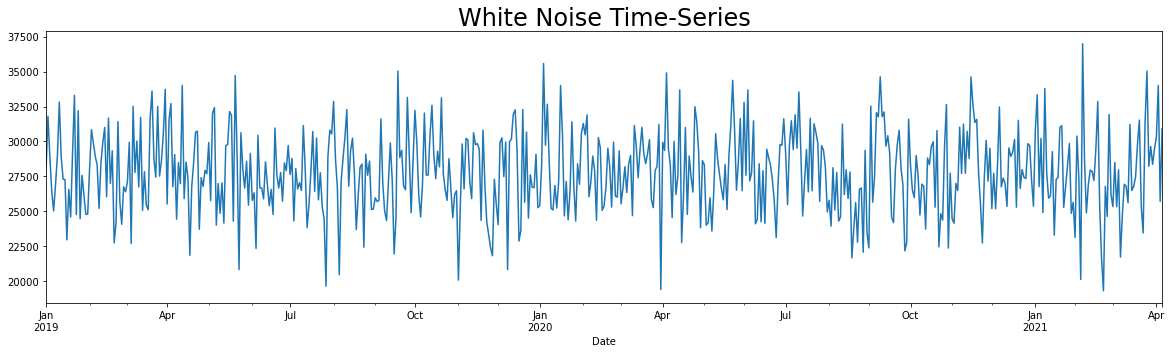

In [16]:
mvdf.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

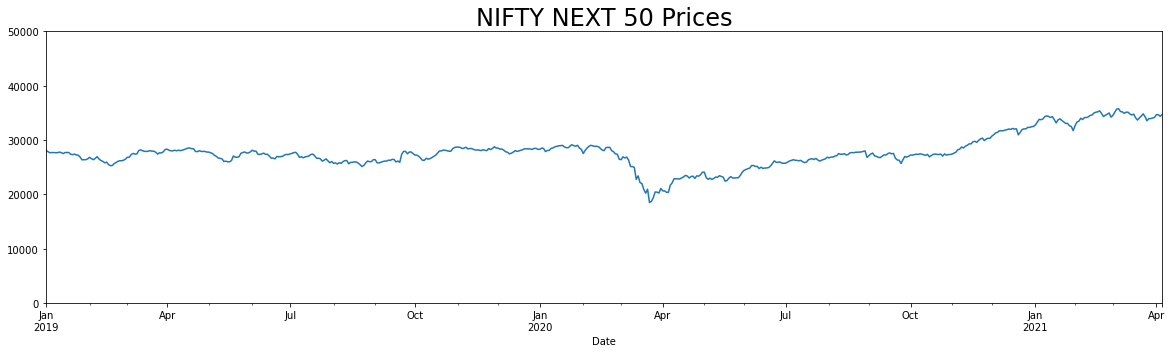

In [17]:
mvdf.Market_Value.plot(figsize=(20,5))
plt.title("NIFTY NEXT 50 Prices", size = 24)
plt.ylim(0,50000)
plt.show()

# Random Walk

The random walk model is widely used in the area of finance. The stock prices or exchange rates (Asset prices) follow a random walk.

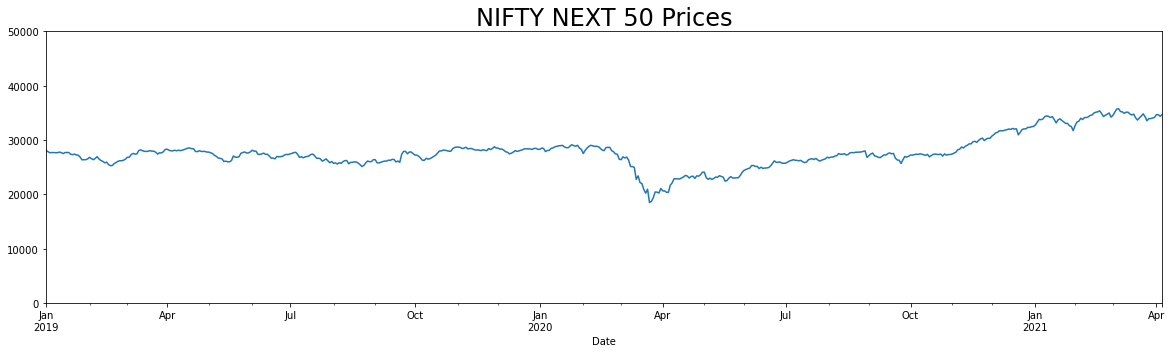

In [18]:
mvdf.Market_Value.plot(figsize=(20,5))
plt.title("NIFTY NEXT 50 Prices", size = 24)
plt.ylim(0,50000)
plt.show()

# Stationary vs Unstationary

For time series to be stationary, it must satisfy 3 conditions:

 <li>Constant mean</li>
 <li>Constant variance</li>
 <li>Constant covariance between periods of identical distance</li>
 
 All it states is that the covariance between time periods of identical lengths (let’s say 10 days/hours/minutes) should be identical to the covariance of some other period of the same length:

That’s clear now, but why do we need stationarity? 2 reasons (the most important ones),
Stationary processes are easier to analyze
Stationarity is assumed by most of the algorithms

In [19]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
#import seaborn as sns
#sns.set()

In [20]:
sts.adfuller(mvdf.Market_Value)

(-0.9061618127322518,
 0.7859364719676205,
 7,
 583,
 {'1%': -3.441616425652826,
  '5%': -2.866510292004876,
  '10%': -2.5694170294713863},
 8290.480888597613)

<b>Data is not Stationary</b>

Statistic(-0.9061618127322518) is greater than each of the critical values (1%, 5%, 10% )


P value = 0.78... This suggests there is roughly a 70 percent chance of not rejecting the null.
So we can't confirm the data is stationary.


The third line represents the number of lags used in the regression when determining the T statistic.
In this case, we have 7, so there are some autocorrelation going back 7 periods.
Of course, we'll take this into account when picking the appropriate model.



# Seasonality

A series is thought to be an aggregate or combination of these four components.
All series have a level and noise. The trend and seasonality components are optional.
It is helpful to think of the components as combining either additively or multiplicatively.

## Additive Model
An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

## Multiplicative Model

A multiplicative model suggests that the components are multiplied together as follows:

y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

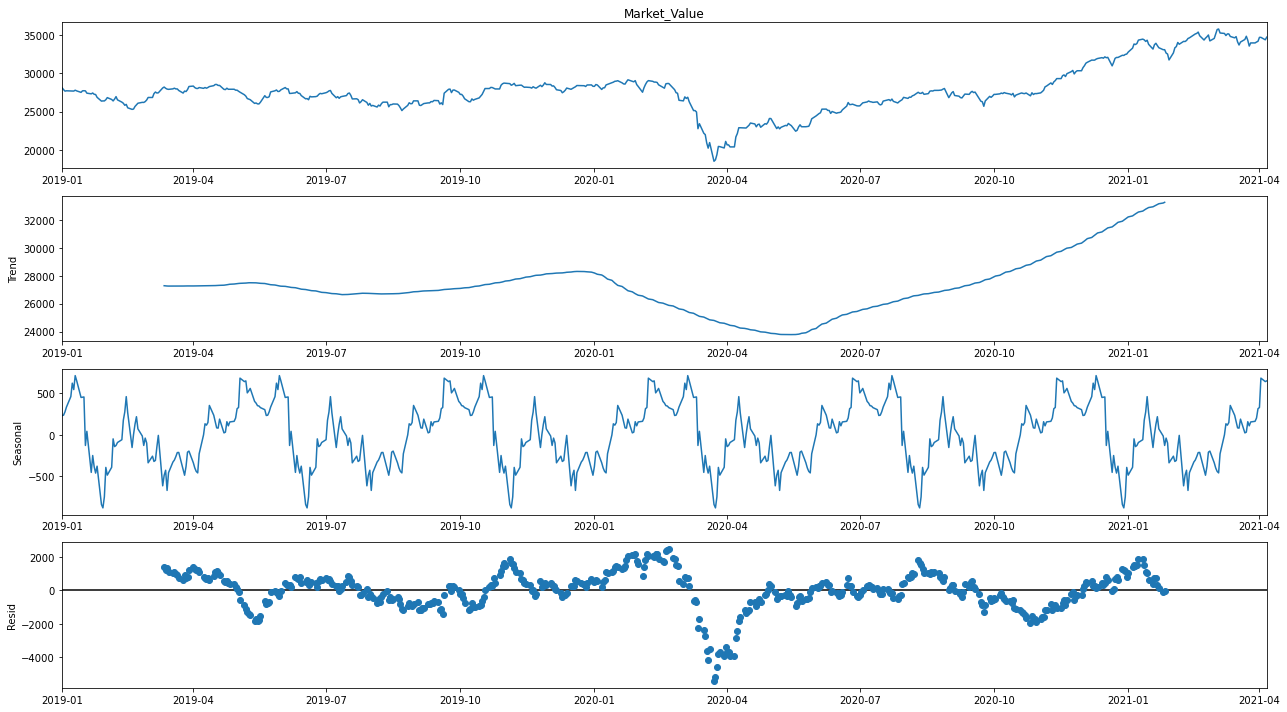

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
s_dec_multiplicative = seasonal_decompose(mvdf.Market_Value, model = "additive", period=100)
s_dec_multiplicative.plot()
plt.show()

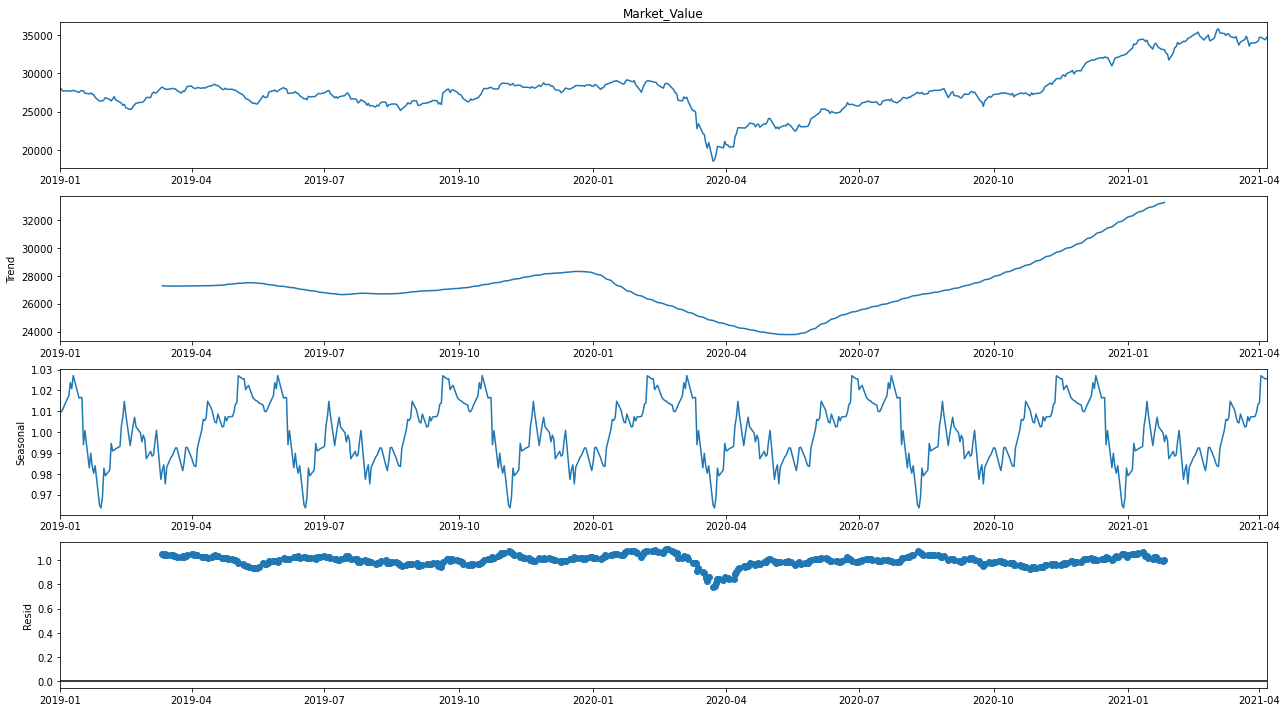

In [34]:
rcParams['figure.figsize'] = 18, 10

s_dec_multiplicative = seasonal_decompose(mvdf.Market_Value, model = "multiplicative", period=100)
s_dec_multiplicative.plot()
plt.show()


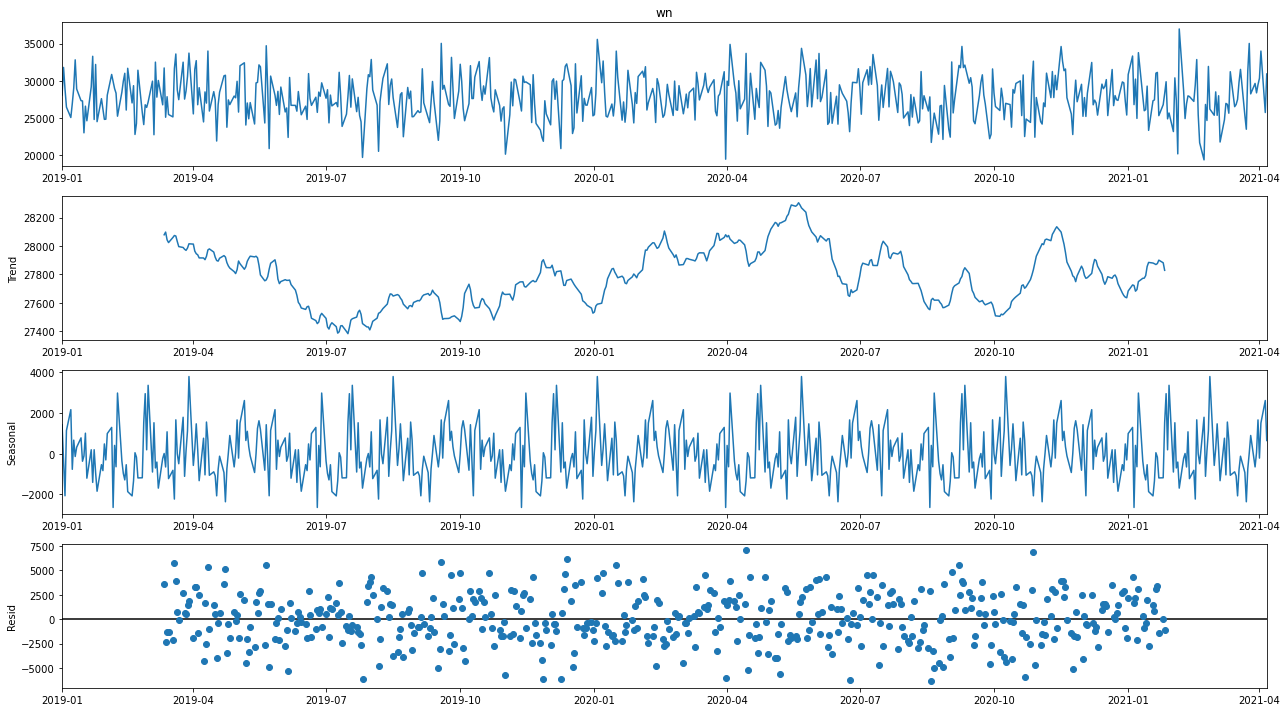

In [35]:
s_dec_multiplicative = seasonal_decompose(mvdf.wn, model = "additive", period=100)
s_dec_multiplicative.plot()
plt.show()

s_dec_multiplicative = seasonal_decompose(mvdf.wn, model = "multiplicative", period=100)
s_dec_multiplicative.plot()
plt.show()

# ACF

<b>Statistical correlation</b> summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a <u>number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation</u>.

We can calculate the correlation for time series observations with observations with previous time steps, called <font color = 'green'><b>lags</b></font>. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot

In [38]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 

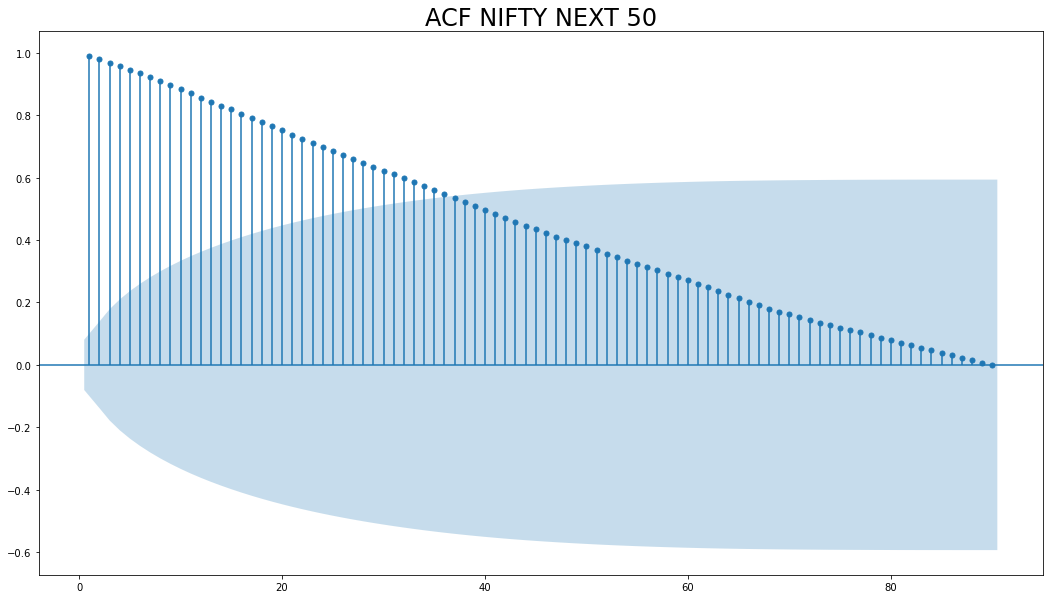

In [48]:
sgt.plot_acf(mvdf.Market_Value, lags = 90, zero = False)
plt.title("ACF NIFTY NEXT 50", size = 24)
plt.show()

Above creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.

<b><u>Confidence intervals</u></b> are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

sgt.plot_acf(mvdf.wn, lags = 40, zero = False)
plt.title("ACF White Noise", size = 24)
plt.show()

# PACF

If we wish to determine only the direct relationship between the TIME series and its lagged version.

We need to compute the partial autocorrelation.

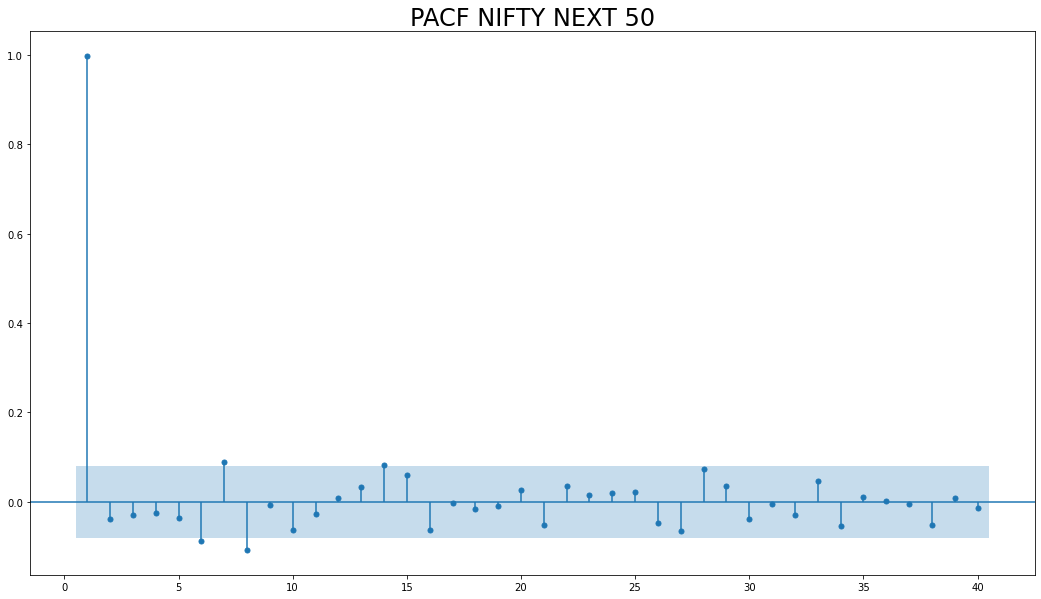

In [44]:
sgt.plot_pacf(mvdf.Market_Value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF NIFTY NEXT 50", size = 24)
plt.show()

 some of the values like the second lag are negative, this means that higher values two periods

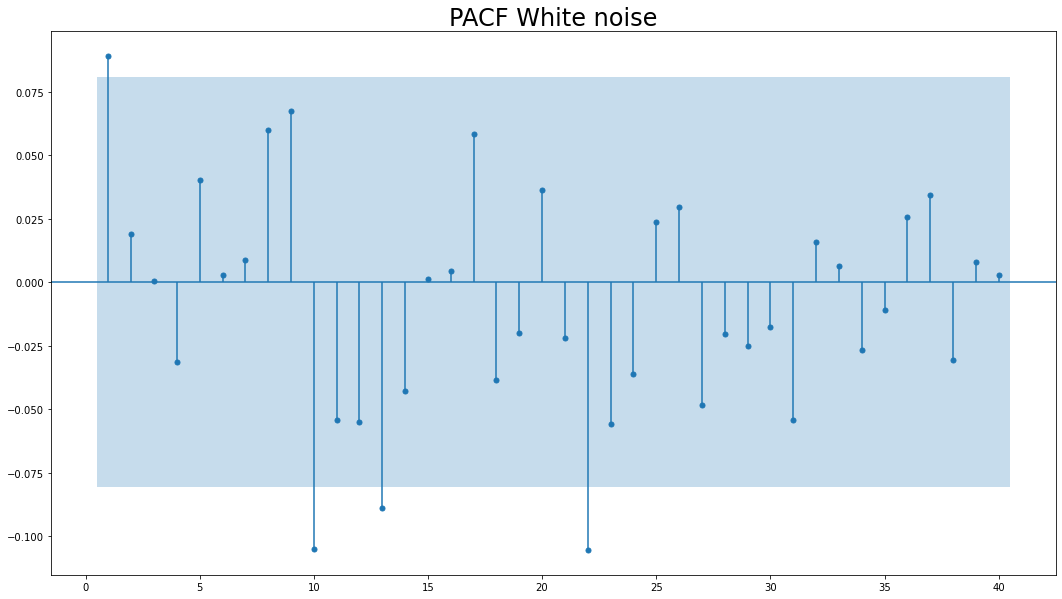

In [45]:
sgt.plot_pacf(mvdf.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF White noise", size = 24)
plt.show()